In [2]:
"""
GravMag: 3D forward modeling of total-field magnetic anomaly using triaxial
ellipsoids (model with induced and remanent magnetization)
"""
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from fatiando import mesher, gridder, utils
from fatiando.gravmag import ellipsoid_triaxial,ellipsoid_triaxial2,ellipsoid_prolate,ellipsoid_oblate

In [3]:
# The regional field
inten,inc, dec = 60000., 30, -15
F_unit = utils.ang2vec(1, inc, dec)

bounds = [-5000, 5000, -5000, 5000, 0, 5000]
# Create a regular grid at 100m height
shape = (200, 200)
area = bounds[:4]
xp, yp, zp = gridder.regular(area, shape, z=0)

## Triaxial

In [4]:
I_l = []
D_l = []
k_l = np.linspace(0.0001, 0.5, 100)

for k in k_l:
    model = [mesher.EllipsoidTriaxial(0.,0.,500.,500.,100.,50.,0.,0.,0., 
                                     {'remanence': [0., 0., 0.],
                                      'k': [k, k, k, 0., 90., 90.]})]

    # Calculate the anomaly for a given regional field
    tf,N1,N2,N3,JRD_ang = ellipsoid_triaxial.tf_c(xp,yp,zp,inten,inc,dec,model)
    I_l.append(JRD_ang[1])
    D_l.append(JRD_ang[2])

cte_inc = np.zeros_like(I_l) + inc
cte_dec = np.zeros_like(I_l) + dec
k_l = k_l

In [5]:
(D_l[15]+D_l[17])/2.+15

array([ 0.68445636])

In [6]:
chi_max = 0.05/N3
chi_max

0.077088922153742925

In [4]:
model = [mesher.EllipsoidTriaxial(0.,0.,500.,500.,100.,50.,0.,0.,0., 
                                     {'remanence': [0., 0., 0.],
                                      'k': [0.077088922153742925, 0.077088922153742925, 0.077088922153742925, 0., 90., 90.]})]

tf,N1,N2,N3,JRD_ang = ellipsoid_triaxial.tf_c(xp,yp,zp,inten,inc,dec,model)

In [14]:
JRD_ang

[3.6453945132060279, array([ 29.55497116]), array([-14.34616156])]

In [15]:
mag_v = utils.ang2vec(3.6453945132060279, 29.55497116, -14.34616156)

In [18]:
mag_a = 0.077088922153742925*(inten/(4*np.pi*100))*F_unit

In [19]:
# relative error
mag_max_norm = np.linalg.norm(mag_v, ord = 2)
mag_max_approx_norm = np.linalg.norm(mag_a, ord = 2)
delta_mag_max_norm = np.linalg.norm(mag_v - mag_a, ord = 2)

epsilon_calculated = delta_mag_max_norm/mag_max_norm

print 'epsilon = %.3f percent' % (epsilon_calculated*100)

epsilon = 1.593 percent


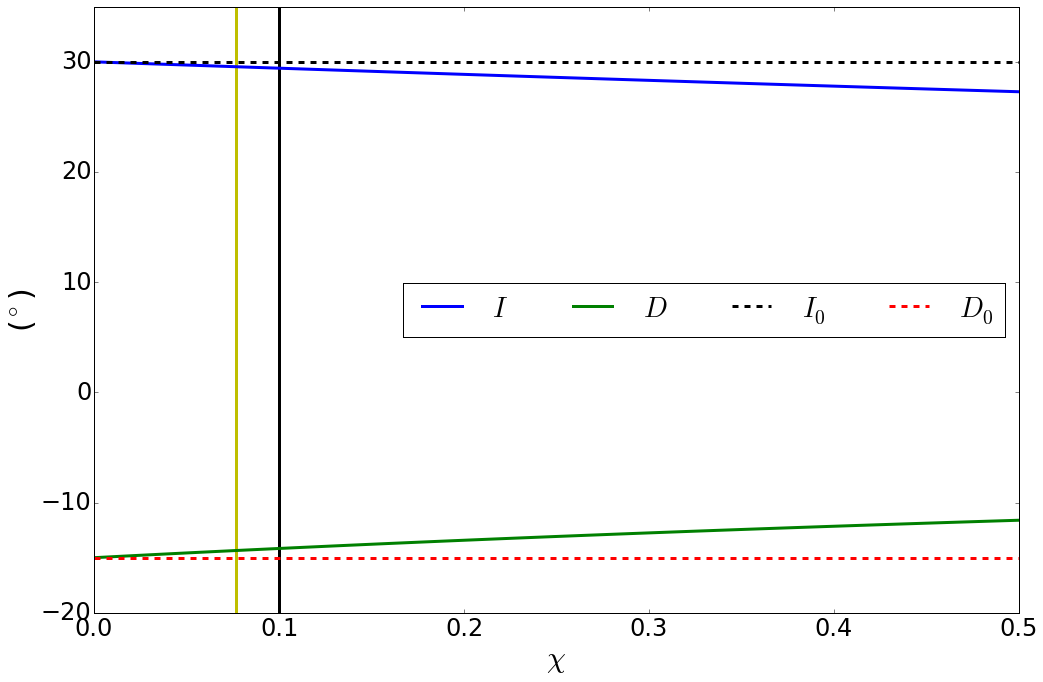

In [9]:
plt.figure(figsize=(15,10))
axes = plt.gca()
plt.plot([0.1,0.1], [-20.,35.], 'k-', linewidth=3.0)
plt.plot([0.077088922153742925,0.077088922153742925], [-20.,35.], 'y-', linewidth=3.0)
plt.plot(k_l,I_l, label='$I$', linewidth=3.0)
plt.plot(k_l,D_l, label='$D$', linewidth=3.0)
plt.plot(k_l,cte_inc, '--k', label='$I_{0}$', linewidth=3.0 )
plt.plot(k_l,cte_dec, '--r', label='$D_{0}$', linewidth=3.0)
plt.legend(loc='best', ncol=4, fontsize=28)
plt.ylabel('($^{\circ}$)', fontsize=30)
plt.xlabel('$\chi$', fontsize=30)
axes.set_ylim(-20.,35.)
#axes.set_xlim([0,5])
matplotlib.rcParams.update({'font.size': 24})
plt.tight_layout()
plt.savefig('test_k_triaxial.jpeg', dpi = 600, facecolor='w', bbox_inches='tight')

In [65]:
c = 50.
m_l = np.linspace(1.02, 5, 50)
N3_l = []
ac = (m_l*c)/c

In [66]:
for m in m_l:
    model = [mesher.EllipsoidTriaxial(0.,0.,1000,c*m,c*1.01,c,0.,0.,0., 
                                     {'remanence': [0., 0., 0.],
                                      'k': [0, 0, 0, 0., 90., 90.]})]

    # Calculate the anomaly for a given regional field
    tf,N1,N2,N3,JRD_ang = ellipsoid_triaxial.tf_c(xp,yp,zp,inten,inc,dec,model)
    N3_l.append(N3)

In [67]:
N3_a = np.zeros_like(N3_l) + N3_l

In [68]:
N3_a

array([ 0.33730594,  0.34739932,  0.35653753,  0.36484115,  0.37241195,
        0.37933636,  0.38568822,  0.39153089,  0.39691908,  0.40190018,
        0.40651546,  0.41080098,  0.4147884 ,  0.41850558,  0.42197715,
        0.42522495,  0.42826839,  0.43112478,  0.43380962,  0.43633678,
        0.43871875,  0.44096679,  0.44309104,  0.44510071,  0.44700415,
        0.44880892,  0.45052195,  0.45214953,  0.45369741,  0.45517089,
        0.45657478,  0.45791354,  0.45919125,  0.46041167,  0.46157829,
        0.46269431,  0.4637627 ,  0.46478622,  0.46576741,  0.46670865,
        0.46761213,  0.46847992,  0.46931391,  0.4701159 ,  0.47088755,
        0.47163041,  0.47234594,  0.4730355 ,  0.47370037,  0.47434175])

In [69]:
chi_max5 = 0.05/N3_a
chi_max2 = 0.02/N3_a
chi_max8 = 0.08/N3_a

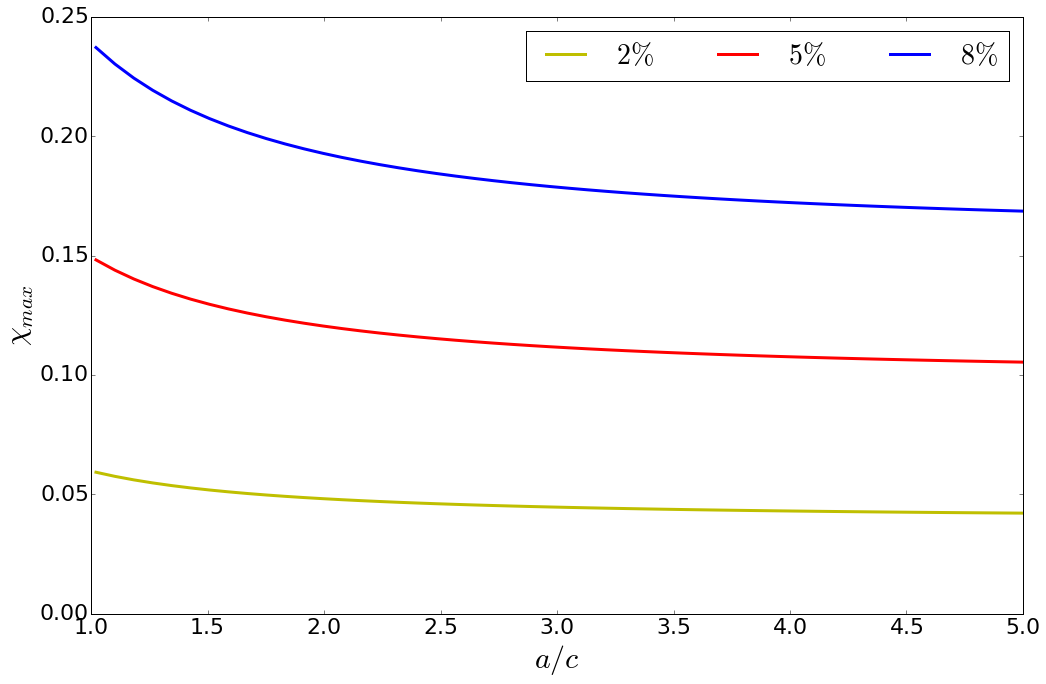

In [71]:
plt.figure(figsize=(15,10))
plt.plot(ac, chi_max2, 'y-', linewidth=3.0, label='$2\%$')
plt.plot(ac, chi_max5, 'r-', linewidth=3.0, label='$5\%$')
plt.plot(ac, chi_max8, 'b-', linewidth=3.0, label='$8\%$')
plt.legend(loc='best', ncol=4, fontsize=28)
plt.xlabel('$a/c$', fontsize=30)
plt.ylabel('$\chi_{max}$', fontsize=30)
#axes.set_ylim(-20.,35.)
#axes.set_xlim([0,5])
matplotlib.rcParams.update({'font.size': 22})
plt.tight_layout()
plt.savefig('test_chi_max.jpeg', dpi = 600, facecolor='w', bbox_inches='tight')